# DATA SCIENCE BLOG POST

The objective of this project is to analyze a dataset using the CRISP-DM method. The CRISP-DM includes the following steps:

In [1]:
#import what is needed to display images
from IPython.display import Image

<img src='image.png' alt='CRISP-DM' style='width: 300px;'/>

I decided to analyze jobs data from Stack Overflow. This is an interesting dataset because individual salary data can be difficult to obtain. Using this dataset I can potentially use it to better understand issues related to salary. One issue that comes to mind is the gender pay gap. Women are often paid less than men, with statistics indicating that it can be as low as 81%. This particular space of the workforce also has a disproportionately low number of women, with some estimates showing female participation in tech jobs as low as 26%.  Because of these two reasons, I want to analyze the gender pay gap using this data to identify if there is a gender pay gap and see if there are specific spaces where pay gaps are more pronounced. 

## Business Understanding
The first step in the data analytics process is business understanding. This requires analysts to develop a better understaning of what issues they want to solve. This step is often associated with developing a specific question 

For this project, the primary question is:
**_Are salaries equal between gender groups?_**

Depending on what is containted in our data some other interestinig questions to ask:
1. What are the salaries between genders when holding level of education constant?  
2. What are the salaries between genders when holding age constant?

## Data Understanding

The next step is to get a better understanding of what data we need to answer our question and find our insights.

Before looking at the dataset there are a few fields that are necessary to perform our analysis: Salary & Gender. 


Education and age would also be good to have if it is available.

We can perform preliminary exploratory data analysis prior to data preparation.

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore') # get rid of simple warnings


In [3]:
# read in the data
data = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [4]:
# how many rows and columns in the data?
data.shape 

(88883, 85)

In [5]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

After looking at the columns in the data and the data dicitonary, potential columns that could be used to answer our questions were identified:
- Salary: 'ConvertedComp'
- Gender: 'Gender'

There also appear to be columns that can be used to answer our other two questions related to education and age:
- Education: 'EdLevel'
- Age: 'Age'

The column for salary data is ConvertedComp. This column represents the total compensation provided by the respondent, but converted to the US dollar. Converting all salaries to the US dollar allows for better comparison using a uniform unit of measure. 

In [6]:
# columns of interest and some basic info
cols = ['ConvertedComp', 'Gender', 'Age', 'EdLevel']
data[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  55823 non-null  float64
 1   Gender         85406 non-null  object 
 2   Age            79210 non-null  float64
 3   EdLevel        86390 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.7+ MB


Proportion of null values in the ConvertedComp column: 0.372



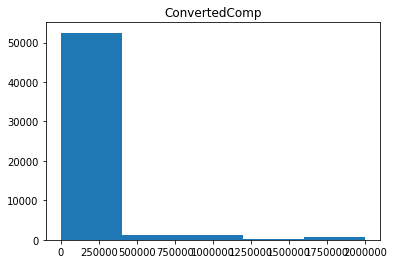


count      55823.000000
mean      127110.738423
std       284152.303842
min            0.000000
25%        25777.500000
50%        57287.000000
75%       100000.000000
max      2000000.000000
Name: ConvertedComp, dtype: object

Proportion of null values in the Gender column: 0.039

                                              Gender  Count  Proportion
0                                                Man  77919    0.912336
1                                              Woman   6344    0.074280
2  Non-binary, genderqueer, or gender non-conforming    597    0.006990
3  Man;Non-binary, genderqueer, or gender non-con...    181    0.002119
4  Woman;Non-binary, genderqueer, or gender non-c...    163    0.001909
5                                          Woman;Man    132    0.001546
6  Woman;Man;Non-binary, genderqueer, or gender n...     70    0.000820
Proportion of null values in the Age column: 0.109



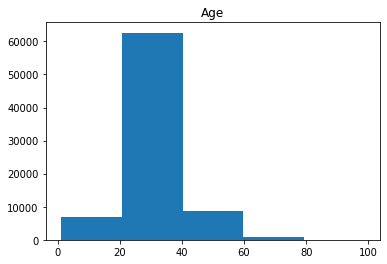


count    79210.000000
mean        30.336699
std          9.178390
min          1.000000
25%         24.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: object

Proportion of null values in the EdLevel column: 0.028

                                             EdLevel  Count  Proportion
0           Bachelor’s degree (BA, BS, B.Eng., etc.)  39134    0.452992
1        Master’s degree (MA, MS, M.Eng., MBA, etc.)  19569    0.226519
2  Some college/university study without earning ...  10502    0.121565
3  Secondary school (e.g. American high school, G...   8642    0.100035
4                                   Associate degree   2938    0.034009
5          Other doctoral degree (Ph.D, Ed.D., etc.)   2432    0.028151
6                          Primary/elementary school   1422    0.016460
7                 Professional degree (JD, MD, etc.)   1198    0.013867
8             I never completed any formal education    553    0.006401


In [7]:
# for each column see proportion of nulls and summary statistics
# summary statistics different for numeric and object columns
for col in cols:
    print('Proportion of null values in the {} column: {}'\
          .format(col,round((data[col].isnull().sum() / len(data.index)), 3)))
    print()
    if data[col].dtype == object:
        test = data[col].value_counts()\
            .rename_axis(col).reset_index(name = 'Count')
        test['Proportion'] = data[col].value_counts(normalize = 'True').values
        print(test)
    else:
        plt.hist(data[col], bins =5)
        plt.title(col)
        plt.show()
        print()
        print(data[col].describe().apply(lambda x: format(x, 'f')))
        print()

## Data Preparation

After taking a look at the initial summary statistics, there are some data preparation steps that will be performed and put into a function:
1. Drop nulls in salary column
 - Salaries are the main focus of this analysis and only respondents with actual values for salary should be analyzed. Shouldn't try to impute using ML techniques or averages, nor should nulls be given a default value. Since this is basically our target variable, we shoudn't be altering it and should only be analyzing provided salaries.
2. Group genders that aren't man or woman.
 - Most of the data concentraed in 'Man' and 'Woman', so for the purpose of this analysis will group the remaining genders and classify them as 'Other'
3. Most of the data for workers in the United States, so for the sake of this only will include United States workers so that differences in country culture and relative pay can be eliminated.

In [8]:
# drop nulls in salary column
# however, first look at breakdown of genders for just the nulls
# maybe more women have null salaries and do not want to report? coud
# this indicate something about culture of knowing someone's salary
test = data[data['ConvertedComp'].isnull() == False]['Gender'].value_counts()\
            .rename_axis('Gender').reset_index(name = 'Count')
test['Proportion'] = data[data['ConvertedComp'].isnull() == False]\
    ['Gender'].value_counts(normalize = 'True').values
print(test)
print()

test = data[data['ConvertedComp'].isnull() == True]['Gender'].value_counts()\
            .rename_axis('Gender').reset_index(name = 'Count')
test['Proportion'] = data[data['ConvertedComp'].isnull() == True]\
    ['Gender'].value_counts(normalize = 'True').values
print(test)

                                              Gender  Count  Proportion
0                                                Man  50503    0.920026
1                                              Woman   3762    0.068533
2  Non-binary, genderqueer, or gender non-conforming    342    0.006230
3  Man;Non-binary, genderqueer, or gender non-con...    115    0.002095
4  Woman;Non-binary, genderqueer, or gender non-c...    106    0.001931
5                                          Woman;Man     40    0.000729
6  Woman;Man;Non-binary, genderqueer, or gender n...     25    0.000455

                                              Gender  Count  Proportion
0                                                Man  27416    0.898502
1                                              Woman   2582    0.084620
2  Non-binary, genderqueer, or gender non-conforming    255    0.008357
3                                          Woman;Man     92    0.003015
4  Man;Non-binary, genderqueer, or gender non-con...     66    

Looks like the proportion of each gender for the reported salary group and not reported salary groups are the same. The Null values don't appear to represent anything significant at this time, so will drop rows that have null values in the Salary column. 

In [9]:
# drop rows where ConvetedComp is NaN
data = data.dropna(subset = ['ConvertedComp'])

# verify no nulls. should be 0
round((data['ConvertedComp'].isnull().sum() / len(data.index)), 3)

0.0

Next, the gender column will be grouped into 'Man', 'Woman', and 'Other' due to the relatively small number of people who responded with genders other than 'Man' and 'Woman'

In [10]:
# group other gender columns together
gender_list = ['Man', 'Woman']
data['Gender'] = np.where(data['Gender']\
                .isin(gender_list), data['Gender'], 'Other')

In [11]:
# verify ended up with 3 columns
data['Gender'].value_counts()

Man      50503
Woman     3762
Other     1558
Name: Gender, dtype: int64

Finally, the dataframe will be filtered so only workers in the United States will be included for this analysis.

In [12]:
# filter dataframe to only include respodnents who work in the us
data = data[data['Country'] == 'United States']

In [13]:
# verify only US remaining
data['Country'].value_counts()

United States    14981
Name: Country, dtype: int64

There are 14,941 rows remaining in the data. This is still a good amount of data to analyze and answer our questions.

Note: Duplicates were not removed due to the possibility of having people with the same characteristics and no way of having a true way to identify if two respondents were the same person. 

In [ ]:
def data_transform(data):
    '''
    This function takes in raw data from Stack Overflow's survey data
    and performs data transformations on the data. The transformed ata
    can be used for analysis. There are three transformation steps:
    1) Drop rows where salary is null. Salary is target variable so need this for analysis
    2) Group other genders: Mostly men and women in dataset, so group remaining for comparison
    3) Remove non-US rows: Only analyzing salaries of US workers
    
    INPUT: Raw dataframe with salary data 
    
    OUTPUT: Transformed dataframe
    '''
    # drop rows where ConvetedComp is NaN
    data = data.dropna(subset = ['ConvertedComp'])
    
    # group other gender columns together
    gender_list = ['Man', 'Woman']
    data['Gender'] = np.where(data['Gender']\
                              .isin(gender_list), data['Gender'], 'Other')
    
    # filter dataframe to only include respodnents who work in the us
    data = data[data['Country'] == 'United States']
    
    return data

## Model and Evaluate

These two steps will be combined. Modeling occurs when we use the wrangled data to answer our business questions. The following were the questions asked earlier in this notebook:
1. Are men and women being paid equally?
2. What are the salaries between men and women when holding level of education constant?  
3. What are the salaries between men and women when holding age constant?


Modeling often times refers to creating a machine learning model for prediction, but in this case we can create data visualizations like charts and tables instead. These visualizations can be used to answer these questions and evaluate the outcomes.


#### Question 1: Are men and women being paid equally?

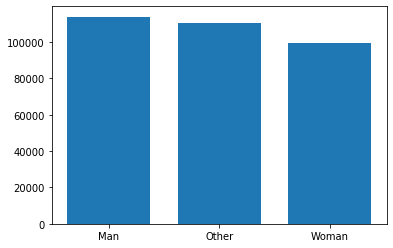

,Gender,ConvertedComp,% of Men Salary,Count
0,Man,"$114,000",100%,"12,985"
1,Other,"$110,500",97%,544
2,Woman,"$99,700",87%,"1,452"


In [14]:
# get ConvertedComp medians grouped by gender
q1 = data.groupby(by = 'Gender').median().drop(['Respondent', \
            'CompTotal', 'WorkWeekHrs', 'WorkWeekHrs', 'Age', 'CodeRevHrs'], axis = 1)

# get gender count
count_array = data['Gender'].value_counts().values
gender_count = [count_array[0], count_array[2], count_array[1]]
gender_count

# get median salaries to 
men_median_sal = q1['ConvertedComp'][0]
other_median_sal = q1['ConvertedComp'][1]
woman_median_sal = q1['ConvertedComp'][2]

q1['% of Men Salary'] = [men_median_sal/men_median_sal,\
                         other_median_sal/men_median_sal,\
                         woman_median_sal/men_median_sal]

q1['Count'] = gender_count


# create bar chart to show each gender's median salary
plt.bar(q1.index, q1['ConvertedComp'], width=.75)
plt.show()

# format dataframe so it looks nicer
q1['ConvertedComp'] = q1['ConvertedComp'].apply(lambda x: "${:,.0f}".format(x))
q1['% of Men Salary'] = q1['% of Men Salary'].apply(lambda x: "{:.0%}".format(x))

# show dataframe in nice format
# format count with comma format
q1['Count'] = q1['Count'].apply(lambda x: "{:,.0f}".format(x))
q1.reset_index()

#### Question 2: What are the salaries between genders when holding level of education constant?

To answer this question, we should be able to compare salaries for each level of education, and within each level of education compare salaries for each of the 3 gender groups.

First will look at all levels of education:

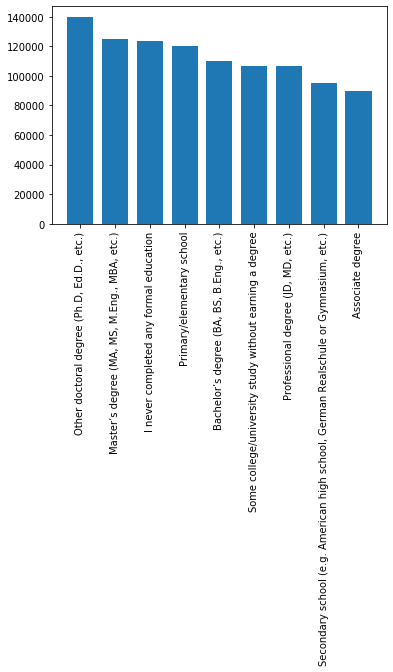

,EdLevel,ConvertedComp
0,"Other doctoral degree (Ph.D, Ed.D., etc.)","$140,000"
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","$125,000"
2,I never completed any formal education,"$123,500"
3,Primary/elementary school,"$120,000"
4,"Bachelor’s degree (BA, BS, B.Eng., etc.)","$110,000"
5,Some college/university study without earning ...,"$107,000"
6,"Professional degree (JD, MD, etc.)","$106,500"
7,"Secondary school (e.g. American high school, G...","$95,000"
8,Associate degree,"$90,000"


In [15]:
# get ConvertedComp medians grouped by gender
q2 = data.groupby(by = 'EdLevel').median().drop(['Respondent', \
            'CompTotal', 'WorkWeekHrs', 'WorkWeekHrs', 'Age', 'CodeRevHrs'], axis = 1).\
            sort_values('ConvertedComp', ascending = False)

# get median salaries to 
#men_median_sal = q1['ConvertedComp'][0]
#other_median_sal = q1['ConvertedComp'][1]
#woman_median_sal = q1['ConvertedComp'][2]

plt.bar(q2.index, q2['ConvertedComp'], width=.75)
plt.xticks(rotation = 90)
plt.show()

\
# format dataframe so it looks nicer
q2['ConvertedComp'] = q2['ConvertedComp'].apply(lambda x: "${:,.0f}".format(x))

# show dataframe in nice format
q2.reset_index()

Now look at each level of education and compare genders within each level:

In [16]:
edlevel = data['EdLevel'].value_counts().\
                    rename_axis('EdLevel').\
                    reset_index(name = 'counts')['EdLevel']

men_edlevel = []
women_edlevel = []
other_edlevel = []
men_count_edlevel = []
women_count_edlevel = []
other_count_edlevel = []

#calculate men salaries
for i in edlevel:
    men_edlevel.append(data[(data['EdLevel'] == i)\
            & (data['Gender'] == 'Man')]['ConvertedComp'].median())

# calculate women salaries
for i in edlevel:
    women_edlevel.append(data[(data['EdLevel'] == i)\
            & (data['Gender'] == 'Woman')]['ConvertedComp'].median())
    
# calculate other salaries
for i in edlevel:
    other_edlevel.append(data[(data['EdLevel'] == i)\
            & (data['Gender'] == 'Other')]['ConvertedComp'].median())


# calculate percent of women to men salaries
percent = [w/m for w, m in zip(women_edlevel,men_edlevel)]
other_percent = [o/m for o, m in zip(other_edlevel,men_edlevel)]

#calculate man count
for i in edlevel:
    men_count_edlevel.append(data[(data['EdLevel'] == i)\
            & (data['Gender'] == 'Man')]['Gender'].count())

# calculate woman count
for i in edlevel:
    women_count_edlevel.append(data[(data['EdLevel'] == i)\
            & (data['Gender'] == 'Woman')]['Gender'].count())

# calculate other count
for i in edlevel:
    other_count_edlevel.append(data[(data['EdLevel'] == i)\
            & (data['Gender'] == 'Woman')]['Gender'].count())
    
# create a dictionary using lists that will be used for each column in dataframe
dict_percent = {'EdLevel':edlevel, 'Men': men_count_edlevel, 'Women': women_count_edlevel,\
                'Other' : other_count_edlevel, 'Men Median Salary': men_edlevel, \
                'Women Median Salary' : women_edlevel, 'Women Salary as % of Men' : percent,\
                'Other Median Salary' : other_edlevel, 'Other Salary as % of Men': other_percent
                }


# create dataframe
edlevel_df = pd.DataFrame(dict_percent)

#format columns
edlevel_df['Men Median Salary'] = edlevel_df['Men Median Salary'].apply(lambda x: "${:,.0f}".format(x))
edlevel_df['Women Median Salary'] = edlevel_df['Women Median Salary'].apply(lambda x: "${:,.0f}".format(x))
edlevel_df['Other Median Salary'] = edlevel_df['Other Median Salary'].apply(lambda x: "${:,.0f}".format(x))
edlevel_df['Men'] = edlevel_df['Men'].apply(lambda x: "{:,.0f}".format(x))
edlevel_df['Women'] = edlevel_df['Women'].apply(lambda x: "{:,.0f}".format(x))
edlevel_df['Other'] = edlevel_df['Other'].apply(lambda x: "{:,.0f}".format(x))
edlevel_df['Women Salary as % of Men'] = edlevel_df['Women Salary as % of Men'].apply(lambda x: "{:.0%}".format(x))
edlevel_df['Other Salary as % of Men'] = edlevel_df['Other Salary as % of Men'].apply(lambda x: "{:.0%}".format(x))
# see dataframe
edlevel_df

,EdLevel,Men,Women,Other,Men Median Salary,Women Median Salary,Women Salary as % of Men,Other Median Salary,Other Salary as % of Men
0,"Bachelor’s degree (BA, BS, B.Eng., etc.)","7,603",895,895,"$110,000","$100,000",91%,"$107,000",97%
1,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","2,265",319,319,"$130,000","$99,950",77%,"$120,000",92%
2,Some college/university study without earning ...,"1,613",107,107,"$108,000","$95,000",88%,"$103,000",95%
3,Associate degree,590,49,49,"$93,500","$62,000",66%,"$85,000",91%
4,"Other doctoral degree (Ph.D, Ed.D., etc.)",405,46,46,"$142,000","$132,500",93%,"$140,000",99%
5,"Secondary school (e.g. American high school, G...",299,14,14,"$96,000","$71,000",74%,"$105,000",109%
6,"Professional degree (JD, MD, etc.)",61,7,7,"$105,000","$88,000",84%,"$1,000,000",952%
7,Primary/elementary school,43,2,2,"$120,000","$435,000",362%,"$90,000",75%
8,I never completed any formal education,41,3,3,"$130,000","$90,000",69%,"$10,000",8%


In [27]:
other_plt

0      $107,000
1      $120,000
2      $103,000
3       $85,000
4      $140,000
5      $105,000
6    $1,000,000
7       $90,000
8       $10,000
Name: Other Median Salary, dtype: object

In [36]:
men_plt = edlevel_df['Men Median Salary']
wmn_plt = edlevel_df['Women Median Salary']
other_plt = edlevel_df['Other Median Salary']
edlevel = edlevel_df['EdLevel'].tolist()

# filter outlier in other category for visual
other_plt = [num for num in other_plt if num != '$1,000,000']

agg = list(zip(men_edlevel, women_edlevel, other_edlevel))
edlevel_plt = pd.DataFrame(agg, columns = ['Man', 'Woman', 'Other'], index = edlevel)

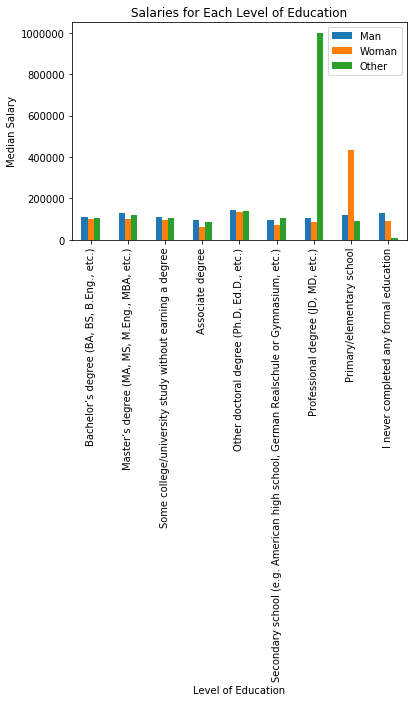

In [33]:
# try chart visual for different perspective if it looks better


edlevel_plt.reset_index().plot(x = 'index', y = ['Man', 'Woman', 'Other'], kind = 'bar')
plt.title("Salaries for Each Level of Education")
plt.xlabel("Level of Education")
plt.ylabel("Median Salary")
plt.show()

Since the charts ended up being very small due to a couple of categories, plot each one individually:

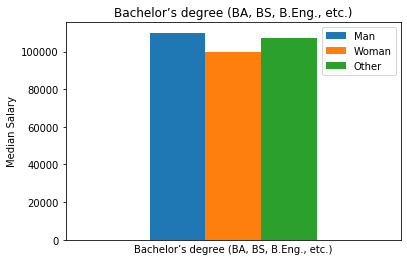

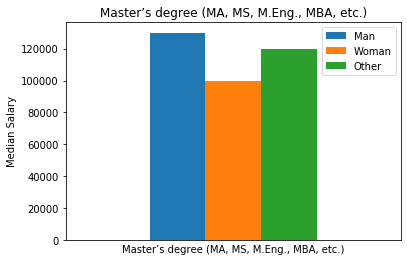

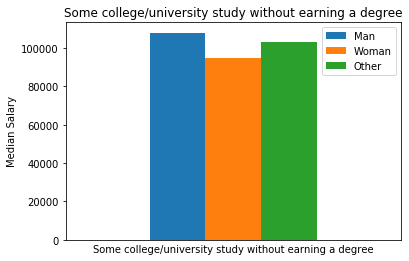

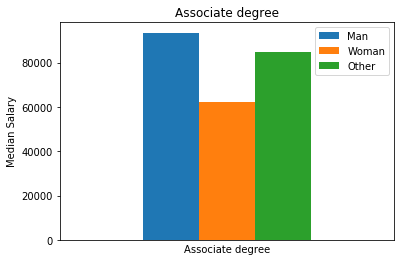

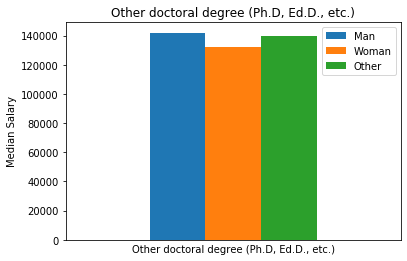

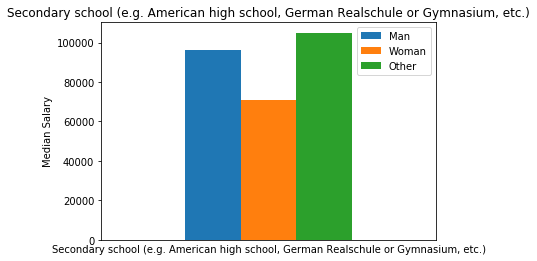

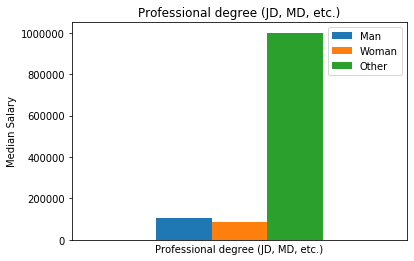

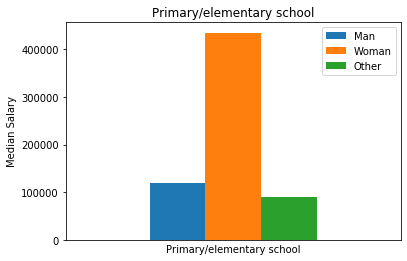

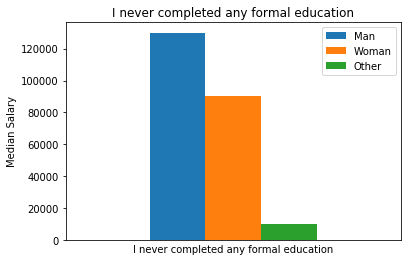

In [21]:
# the Professional degree and Primary school categories are very skewed
# try each individually

for i in enumerate(edlevel):
    pd.DataFrame(edlevel_plt.reset_index().iloc[i[0]][1:4]).T.reset_index().\
        rename(columns = {'index':i[1]}).plot(x = i[1], y = ['Man', 'Woman', 'Other'],\
        kind = 'bar')
    plt.title(i[1])
    plt.ylabel("Median Salary")
    plt.tick_params(
        axis='x',          # apply to the x-axis
        bottom=False,      # remove bottomr ticks
        labelbottom=False) 
    plt.show()

To reiterate, the question was: **What are the salaries between genders when holding level of education constant?**

Answer:  **Men make more than other genders in every level of education except in for 3 categories. The categories are:**
- **"Primary/Elementary School"** 
- **"I never completed any formal education"**
- **"Secondary school"**

In [22]:
edlevel_df.iloc[5:8,:]

,EdLevel,Men,Women,Other,Men Median Salary,Women Median Salary,Women Salary as % of Men,Other Median Salary,Other Salary as % of Men
5,"Secondary school (e.g. American high school, G...",299,14,14,"$96,000","$71,000",74%,"$105,000",109%
6,"Professional degree (JD, MD, etc.)",61,7,7,"$105,000","$88,000",84%,"$1,000,000",952%
7,Primary/elementary school,43,2,2,"$120,000","$435,000",362%,"$90,000",75%


#### Question 3: What are the salaries between genders when holding age constant?

Exploring the age column revealed a couple more cleaning steps:


There are people with ages 1, 2, and 99. 

In [38]:
q3 = data.groupby(by = 'Age').median().drop(['Respondent', \
            'CompTotal', 'WorkWeekHrs', 'WorkWeekHrs', 'CodeRevHrs'], axis = 1).reset_index()
q3

,Age,ConvertedComp
0,1.0,62620.0
1,2.0,75000.0
2,15.0,150000.0
3,16.0,73100.0
4,17.0,7500.0
...,...,...
62,70.0,107500.0
63,71.0,182500.0
64,72.0,96000.0
65,74.0,120000.0


In [39]:
# how many for these ages?
data[data['Age'].isin([1,2,99])]['Age'].value_counts()

1.0     4
99.0    2
2.0     1
Name: Age, dtype: int64

In [40]:
# what are these salaries?
data[data['Age'].isin([1,2,99])][['Age', 'ConvertedComp']]

,Age,ConvertedComp
11799,1.0,2000000.0
12161,1.0,1.0
20086,99.0,125000.0
29354,2.0,75000.0
50517,99.0,2000000.0
71484,1.0,240.0
84141,1.0,125000.0


These do not seem like legitimate answers due to the age values and each rows reported salary. This survey was a public survey, and some answers may not have been answered in good faith. These appear so, and will be removed. 

In [41]:
# remove throws with these ages
q3 = data[~data['Age'].isin([99,2,1])]

# verify removal
q3.groupby(by = 'Age').median().drop(['Respondent', \
            'CompTotal', 'WorkWeekHrs', 'WorkWeekHrs', 'CodeRevHrs'], axis = 1).reset_index()

,Age,ConvertedComp
0,15.0,150000.0
1,16.0,73100.0
2,17.0,7500.0
3,18.0,20000.0
4,19.0,32500.0
...,...,...
59,69.0,132500.0
60,70.0,107500.0
61,71.0,182500.0
62,72.0,96000.0


After these rows were removed, we can look at the remaining data:

In [42]:
# how many ages in dataset?
print(len(q3['Age'].value_counts()))
print()
# how many people in each age?
print(q3['Age'].value_counts())

# what are the medians for each age?
q3.groupby(by = 'Age').median().drop(['Respondent', \
            'CompTotal', 'WorkWeekHrs', 'WorkWeekHrs', 'CodeRevHrs'], axis = 1).reset_index()

64

27.0    788
30.0    777
29.0    777
28.0    768
25.0    754
       ... 
24.5      1
74.0      1
26.5      1
61.3      1
37.5      1
Name: Age, Length: 64, dtype: int64


,Age,ConvertedComp
0,15.0,150000.0
1,16.0,73100.0
2,17.0,7500.0
3,18.0,20000.0
4,19.0,32500.0
...,...,...
59,69.0,132500.0
60,70.0,107500.0
61,71.0,182500.0
62,72.0,96000.0


In [43]:
print(sum(q3['Age'] == 24.5))
print(sum(q3['Age'] == 24))
print(sum(q3['Age'] == 25))

1
693
754


There are 64 different ages in this dataset. This is a lot of ages to compare. In addition, there are some ages such as 24.5 which makes ages hard to compare with each other. To assist with the issue of a large number of ages, I can compare salaries between generations, and then between genders in each generation.

A generation is defined based on a person's year of birth. Pew Research Center provided the following graphic illustrating how each generation is defined:

<img src='generations.png' alt='generations' style='width: 800px;'/>

Using this information, I can use the age of the person and get a good estimate of the generation they belong to and decrease the number of categorie being compared:

In [44]:
# calculate age boundaries for each generation
year_curr = 2019 # use 2019 since this was survey data from 2019
boomer_age_upper = year_curr - 1946
boomer_age_lower = year_curr - 1964
genx_age_upper = year_curr - 1965
genx_age_lower= year_curr -1980
millenial_age_upper = year_curr - 1981
millenial_age_lower = year_curr - 1996
genz_age_upper = year_curr - 1997
genz_age_lower = year_curr - 2012
silent_age_upper = year_curr - 1928
silent_age_lower = year_curr - 1945

In [45]:
#create new rows
q3.loc[q3['Age'] >= silent_age_lower, 'Age_Gen'] = 'Silent'
q3.loc[((q3['Age'] >= boomer_age_lower) & \
              (q3['Age'] <= boomer_age_upper)), 'Age_Gen'] = 'Boomers'
q3.loc[((q3['Age'] >= genx_age_lower) & \
              (q3['Age'] <= genx_age_upper)), 'Age_Gen'] = 'Generation X'
q3.loc[((q3['Age'] >= millenial_age_lower) & \
              (q3['Age'] <= millenial_age_upper)), 'Age_Gen'] = 'Millenials'
q3.loc[((q3['Age'] >= genz_age_lower) & \
              (q3['Age'] <= genz_age_upper)), 'Age_Gen'] = 'Generation Z'

In [46]:
q3[['Age','Age_Gen']]

,Age,Age_Gen
3,22.0,Generation Z
12,28.0,Millenials
21,47.0,Generation X
22,22.0,Generation Z
25,34.0,Millenials
...,...,...
88312,36.0,Millenials
88321,26.0,Millenials
88323,23.0,Millenials
88324,48.0,Generation X


In [47]:
# create table for generations
# drop silent generation, since only one person in that group
generation = q3[q3['Age_Gen']!='Silent']['Age_Gen'].value_counts().\
                    rename_axis('Age_Gen').\
                    reset_index(name = 'counts')['Age_Gen']

men_age_gen = []
women_age_gen = []
other_age_gen = []
men_count_age_gen = []
women_count_age_gen = []
other_count_age_gen = []

#calculate men salaries
for i in generation:
    men_age_gen.append(q3[(q3['Age_Gen'] == i)\
            & (q3['Gender'] == 'Man')]['ConvertedComp'].median())

# calculate women salaries
for i in generation:
    women_age_gen.append(q3[(q3['Age_Gen'] == i)\
            & (q3['Gender'] == 'Woman')]['ConvertedComp'].median())
    
# calculate other salaries
for i in generation:
    other_age_gen.append(q3[(q3['Age_Gen'] == i)\
            & (q3['Gender'] == 'Other')]['ConvertedComp'].median())


# calculate percent of women to men salaries
percent = [w/m for w, m in zip(women_age_gen,men_age_gen)]
other_percent = [o/m for o, m in zip(other_age_gen,men_age_gen)]

#calculate man count
for i in generation:
    men_count_age_gen.append(q3[(q3['Age_Gen'] == i)\
            & (q3['Gender'] == 'Man')]['Gender'].count())

# calculate woman count
for i in generation:
    women_count_age_gen.append(q3[(q3['Age_Gen'] == i)\
            & (q3['Gender'] == 'Woman')]['Gender'].count())

# calculate other count
for i in generation:
    other_count_age_gen.append(q3[(q3['Age_Gen'] == i)\
            & (q3['Gender'] == 'Other')]['Gender'].count())
    
# create a dictionary using lists that will be used for each column in dataframe
dict_percent = {'Age_Gen':generation, 'Men': men_count_age_gen, 'Women': women_count_age_gen,\
                'Other' : other_count_age_gen, 'Men Median Salary': men_age_gen, \
                'Women Median Salary' : women_age_gen, 'Women Salary as % of Men' : percent,\
                'Other Median Salary' : other_age_gen, 'Other Salary as % of Men': other_percent
                }


# create dataframe
gen_df = pd.DataFrame(dict_percent)

#sort dataframe
#gen_df = gen_df.sort_values('Men Median Salary')

#format columns
gen_df['Men Median Salary'] = gen_df['Men Median Salary'].apply(lambda x: "${:,.0f}".format(x))
gen_df['Women Median Salary'] = gen_df['Women Median Salary'].apply(lambda x: "${:,.0f}".format(x))
gen_df['Other Median Salary'] = gen_df['Other Median Salary'].apply(lambda x: "${:,.0f}".format(x))
gen_df['Men'] = gen_df['Men'].apply(lambda x: "{:,.0f}".format(x))
gen_df['Women'] = gen_df['Women'].apply(lambda x: "{:,.0f}".format(x))
gen_df['Other'] = gen_df['Other'].apply(lambda x: "{:,.0f}".format(x))
gen_df['Women Salary as % of Men'] = gen_df['Women Salary as % of Men'].apply(lambda x: "{:.0%}".format(x))
gen_df['Other Salary as % of Men'] = gen_df['Other Salary as % of Men'].apply(lambda x: "{:.0%}".format(x))


# see dataframe
gen_df

,Age_Gen,Men,Women,Other,Men Median Salary,Women Median Salary,Women Salary as % of Men,Other Median Salary,Other Salary as % of Men
0,Millenials,"8,923","1,094",287,"$108,000","$98,000",91%,"$104,300",97%
1,Generation X,"2,447",222,65,"$134,000","$101,000",75%,"$134,000",100%
2,Generation Z,635,62,28,"$70,000","$72,000",103%,"$55,000",79%
3,Boomers,492,25,17,"$131,700","$108,000",82%,"$121,000",92%


In [48]:
# sort by youngest to oldest generations
gen_df.iloc[[2,0,1,3]]

,Age_Gen,Men,Women,Other,Men Median Salary,Women Median Salary,Women Salary as % of Men,Other Median Salary,Other Salary as % of Men
2,Generation Z,635,62,28,"$70,000","$72,000",103%,"$55,000",79%
0,Millenials,"8,923","1,094",287,"$108,000","$98,000",91%,"$104,300",97%
1,Generation X,"2,447",222,65,"$134,000","$101,000",75%,"$134,000",100%
3,Boomers,492,25,17,"$131,700","$108,000",82%,"$121,000",92%


For the most part, each generation follows the typical gender pay gap of men having a higher median salary than women. There are two areas that are interesting:

**1. Women in Gen Z**: Women have a higher median salary by $2,000. This is interesting since they are the youngest generation, so it is good to see that that it goes against the typcial pay gap for the most recent workers entering the workforce. It would be interesting how this salary comparison changes over time with the same group of workers. Will the pay gap eventually close with more equal median salaries? Will this pay gap remain? Or will it switch towards the historical pay gap of men making more than woman?

This could indicate how gender pay bias changes overtime and at different stages of someone's career. This analysis is out of scope for this analysis, but could be interesting to do further analysis. 

In [49]:
gen_df[gen_df['Age_Gen']=='Generation Z']

,Age_Gen,Men,Women,Other,Men Median Salary,Women Median Salary,Women Salary as % of Men,Other Median Salary,Other Salary as % of Men
2,Generation Z,635,62,28,"$70,000","$72,000",103%,"$55,000",79%


**2. 'Other' Gender in Gen X**: The 'Other' category for gender makes the same median salary as men. This group also made more than women, which is also interesting since this category aligns with men.

In [50]:
gen_df[gen_df['Age_Gen']=='Generation X']

,Age_Gen,Men,Women,Other,Men Median Salary,Women Median Salary,Women Salary as % of Men,Other Median Salary,Other Salary as % of Men
1,Generation X,"2,447",222,65,"$134,000","$101,000",75%,"$134,000",100%


Next, I'll also visualize the table above into bar charts for each generation

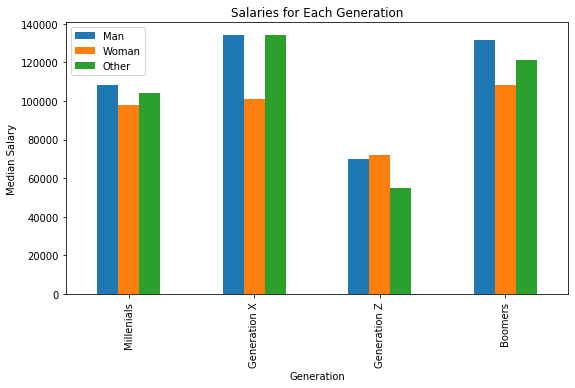

In [70]:
# bar chart with each generation having three bars for each gender
men_plt = gen_df['Men Median Salary']
wmn_plt = gen_df['Women Median Salary']
other_plt = gen_df['Other Median Salary']

# try chart visual for different perspective if it looks better
gen_list = gen_df['Age_Gen'].tolist()

agg = list(zip(men_age_gen, women_age_gen, other_age_gen))
gen_plt = pd.DataFrame(agg, columns = ['Man', 'Woman', 'Other'], index = gen_list)

gen_plt.reset_index().plot(x = 'index', y = ['Man', 'Woman', 'Other'], kind = 'bar')
plt.title("Salaries for Each Generation")
plt.xlabel("Generation")
plt.ylabel("Median Salary")
plt.rcParams["figure.figsize"] = [12,5]
plt.show()



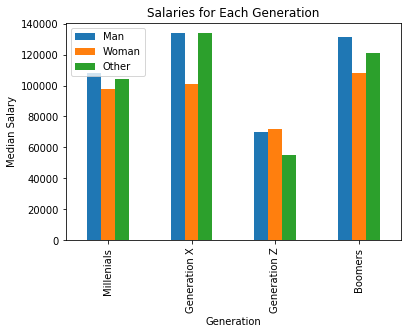

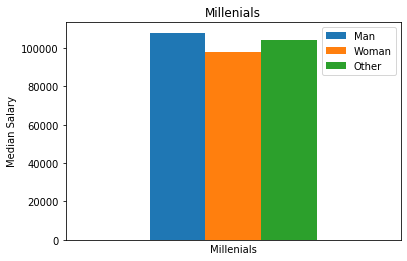

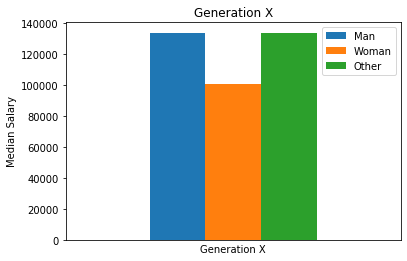

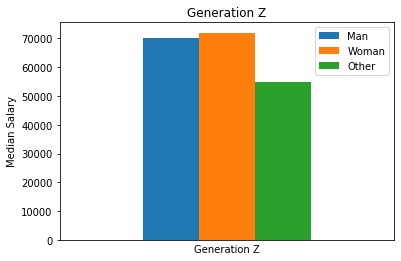

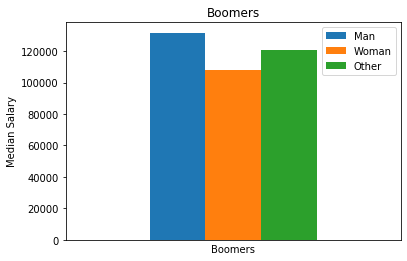

In [74]:
# bar chart with each generation having three bars for each gender
men_plt = gen_df['Men Median Salary']
wmn_plt = gen_df['Women Median Salary']
other_plt = gen_df['Other Median Salary']

# try chart visual for different perspective if it looks better
gen_list = gen_df['Age_Gen'].tolist()

agg = list(zip(men_age_gen, women_age_gen, other_age_gen))
gen_plt = pd.DataFrame(agg, columns = ['Man', 'Woman', 'Other'], index = gen_list)


gen_plt.reset_index().plot(x = 'index', y = ['Man', 'Woman', 'Other'], kind = 'bar')
plt.title("Salaries for Each Generation")
plt.xlabel("Generation")
plt.ylabel("Median Salary")
plt.show()

for i in enumerate(gen_list):
    pd.DataFrame(gen_plt.reset_index().iloc[i[0]][1:4]).T.reset_index().\
        rename(columns = {'index':i[1]}).plot(x = i[1], y = ['Man', 'Woman', 'Other'],\
        kind = 'bar')
    plt.title(i[1])
    plt.ylabel("Median Salary")
    plt.tick_params(
        axis='x',          # apply to the x-axis
        bottom=False,      # remove bottom ticks
        labelbottom=False) 
    plt.show()

## Deployment

Deployment can be interpreted in a couple of ways:
- Deploying your model into production to automate tasks or make predictions.  
- Communicate for others to take action.

In this context, we do not need to deploy any models since we are using descriptive statistics to answer our questions. However, we can communicate our work to a wider audience. We can do this by creating a blog post that outlines our processes and findings